In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
train_input, test_input, train_target, test_target = \
    train_test_split(perch_full, perch_weight, random_state=1234)

In [6]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_input_poly = poly.transform(train_input)

print(train_input_poly.shape)

(42, 9)


In [9]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [12]:
test_input_poly = poly.transform(test_input)
print(test_input_poly.shape)

(14, 9)


In [13]:
lr = LinearRegression()
lr.fit(train_input_poly, train_target)

print(lr.score(train_input_poly, train_target))
print(lr.score(test_input_poly, test_target))

0.9892417459890812
0.9848861741569646


In [14]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_input_poly = poly.transform(train_input)
test_input_poly = poly.transform(test_input)

print(train_input_poly.shape)

(42, 55)


In [15]:
lr.fit(train_input_poly, train_target)

print(lr.score(train_input_poly, train_target))
print(lr.score(test_input_poly, test_target))

0.9999999999945918
-101.18147262905767


## Regularization

In [16]:
scaler = StandardScaler()
scaler.fit(train_input_poly)
train_input_poly_scaled = scaler.transform(train_input_poly)
test_input_poly_scaled = scaler.transform(test_input_poly)

* Regularization (1): ridge

In [17]:
ridge = Ridge()
ridge.fit(train_input_poly_scaled, train_target)

print(ridge.score(train_input_poly_scaled, train_target))
print(ridge.score(test_input_poly_scaled, test_target))

0.9888431656242801
0.9858204095805282


In [18]:
train_score = []
test_score = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_input_poly_scaled, train_target)
    train_score.append(ridge.score(train_input_poly_scaled, train_target))
    test_score.append(ridge.score(test_input_poly_scaled, test_target))

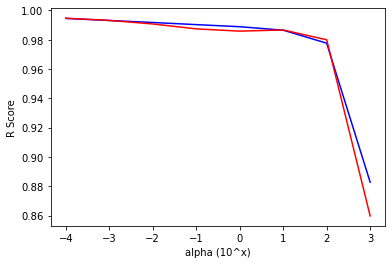

In [20]:
plt.plot(np.log10(alpha_list), train_score, color='b')
plt.plot(np.log10(alpha_list), test_score, color='r')

plt.xlabel('alpha (10^x)')
plt.ylabel('R Score')
plt.show()

In [22]:
ridge = Ridge(alpha=10^(-1))
ridge.fit(train_input_poly_scaled, train_target)
print('R Score (Training Set):', ridge.score(train_input_poly_scaled, train_target).round(4))
print('R Score (Test Set):', ridge.score(test_input_poly_scaled, test_target).round(4))

R Score (Training Set): 0.9553
R Score (Test Set): 0.9858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


* Regularization (2): lasso

In [23]:
lasso = Lasso()

lasso.fit(train_input_poly_scaled, train_target)

print(lasso.score(train_input_poly_scaled, train_target))
print(lasso.score(test_input_poly_scaled, test_target))

0.9881865081467087
0.9852859384959229


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826.4740227505536, tolerance: 499.3280099047619
  model = cd_fast.enet_coordinate_descent(


In [24]:
train_score = []
test_score = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_input_poly_scaled, train_target)
    train_score.append(lasso.score(train_input_poly_scaled, train_target))
    test_score.append(lasso.score(test_input_poly_scaled, test_target))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18820.481560921897, tolerance: 499.3280099047619
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17553.760470731304, tolerance: 499.3280099047619
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7270.554315197311, tolerance: 499.3280099047619
  model = cd_fast.enet_coordinate_descent(


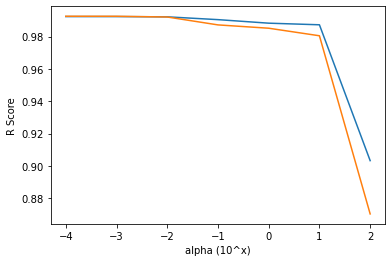

In [25]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha (10^x)')
plt.ylabel('R Score')
plt.show()

In [27]:
lasso = Lasso(alpha=10^1)
lasso.fit(train_input_poly_scaled, train_target)
print('R Score (Training Set):', lasso.score(train_input_poly_scaled, train_target).round(4))
print('R Score (Test Set):', lasso.score(test_input_poly_scaled, test_target).round(4))

R Score (Training Set): 0.9871
R Score (Test Set): 0.9799


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908.318197359833, tolerance: 499.3280099047619
  model = cd_fast.enet_coordinate_descent(


In [28]:
print(np.sum(lasso.coef_ == 0))

47
